In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')

In [3]:
def transform(a):
    if pd.notna(a):
        return str(a)[:-15]
    else:
        return None

data1=data['saledate'].apply(transform)
data['saledate'] = pd.to_datetime(data1, format='%a %b %d %Y %H:%M:%S')
data.transmission=data.transmission.fillna('automatic')
data.dropna(inplace=True)

<Axes: xlabel='sellingprice', ylabel='Density'>

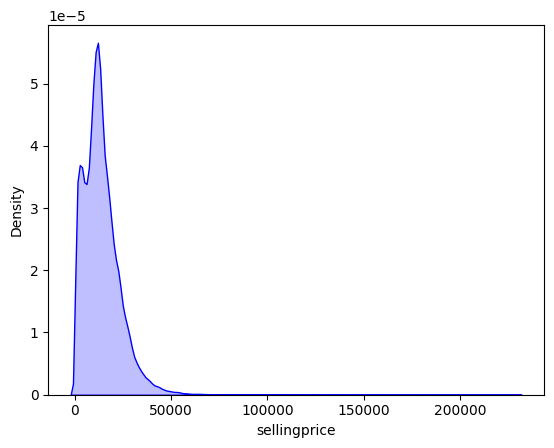

In [4]:
sb.kdeplot(data.sellingprice,color='blue',fill=True)

**Average Price is below 50000**

<Axes: xlabel='mmr', ylabel='Density'>

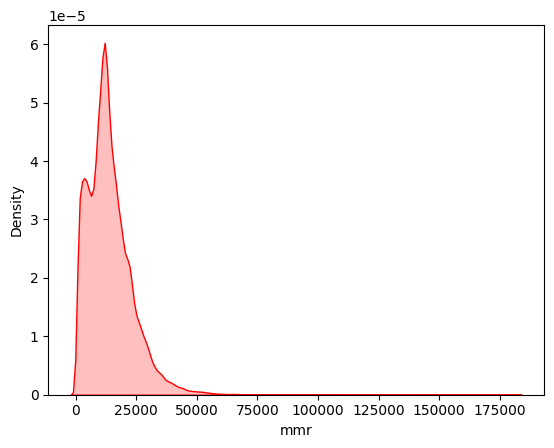

In [5]:
sb.kdeplot(data.mmr,fill=True,color='red')

**Here we can see that estimated market price value is low for high range vehicles**

<Axes: xlabel='sellingprice', ylabel='mmr'>

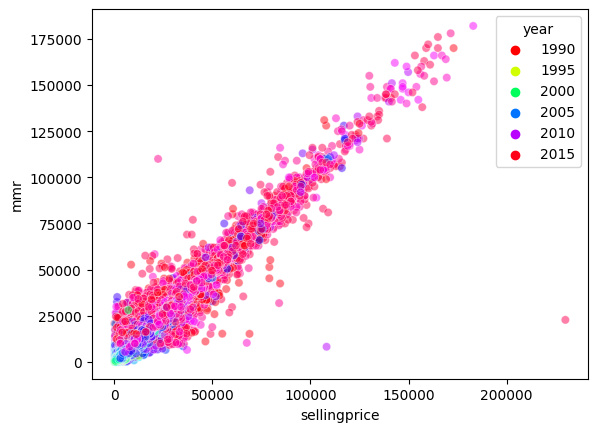

In [6]:
sb.scatterplot(x='sellingprice',y='mmr',data=data,hue='year',alpha=0.5,palette='hsv')

**We can see that there is a certain % of drop in prices**

In [7]:
data['percentage']=((data.mmr-data.sellingprice)/data.sellingprice)*100
def format(a):
    return np.round(a,decimals=2)
overall_percentage=data[['percentage','make']].groupby('make').sum().apply(format)
def func(a):
    if a<0:
        return 'negative'
    else:
        return 'positive'
overall_percentage['nature']=overall_percentage['percentage'].apply(func)
overall_percentage['percentage']=np.abs(overall_percentage['percentage'])

Text(0.5, 1.0, 'Overall Percentage')

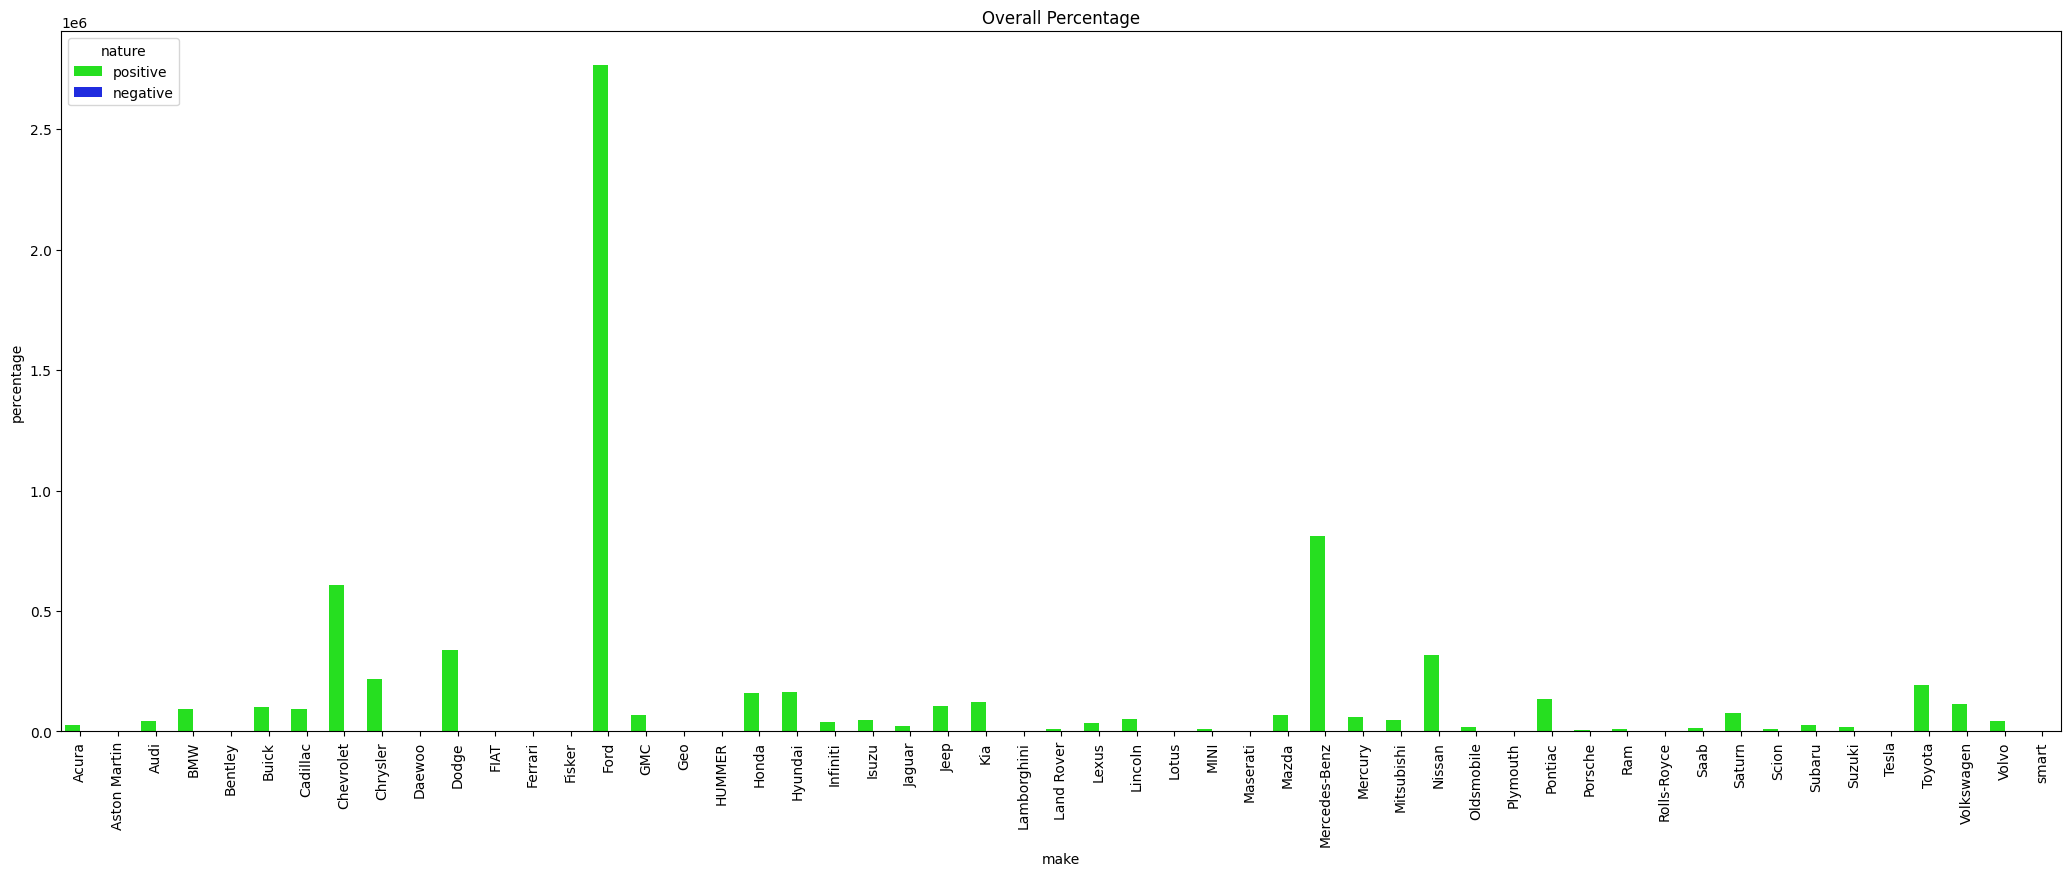

In [8]:
fig=plt.figure(figsize=(20,7))
axis=fig.add_axes([1,1,1,1])
sb.barplot(data=overall_percentage,x=overall_percentage.index,y='percentage',hue='nature',ax=axis,palette='hsv')
plt.xticks(rotation=90)
plt.title('Overall Percentage')

Text(0.5, 1.0, 'Negative Percentages')

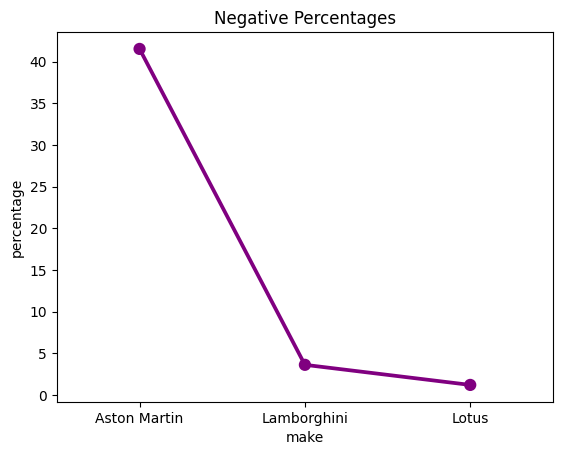

In [9]:
neg_value=overall_percentage.query("nature== 'negative' ")
sb.pointplot(x=neg_value.index,y=neg_value.percentage,color='purple')
plt.title('Negative Percentages')

**It looks ford brand car's price are increasing over a period**

Text(0.5, 1.0, 'Transmission')

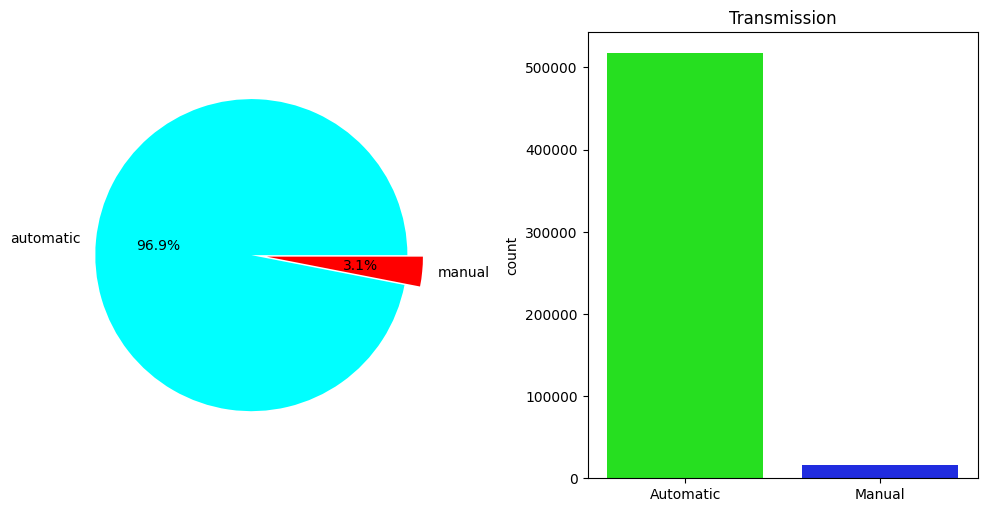

In [10]:
fig=plt.figure(figsize=(10,5))
axes=fig.subplots(1,2)
transmission=data.transmission.value_counts()
axes[0].pie(transmission,labels=transmission.index,autopct="%1.1f%%",explode=[0,0.1],colors=['cyan','red'])
sb.barplot(data=transmission,x=['Automatic','Manual'],y=transmission,ax=axes[1],palette='hsv')
plt.tight_layout()
plt.title('Transmission')

Text(0.5, 1.0, "Car's Count")

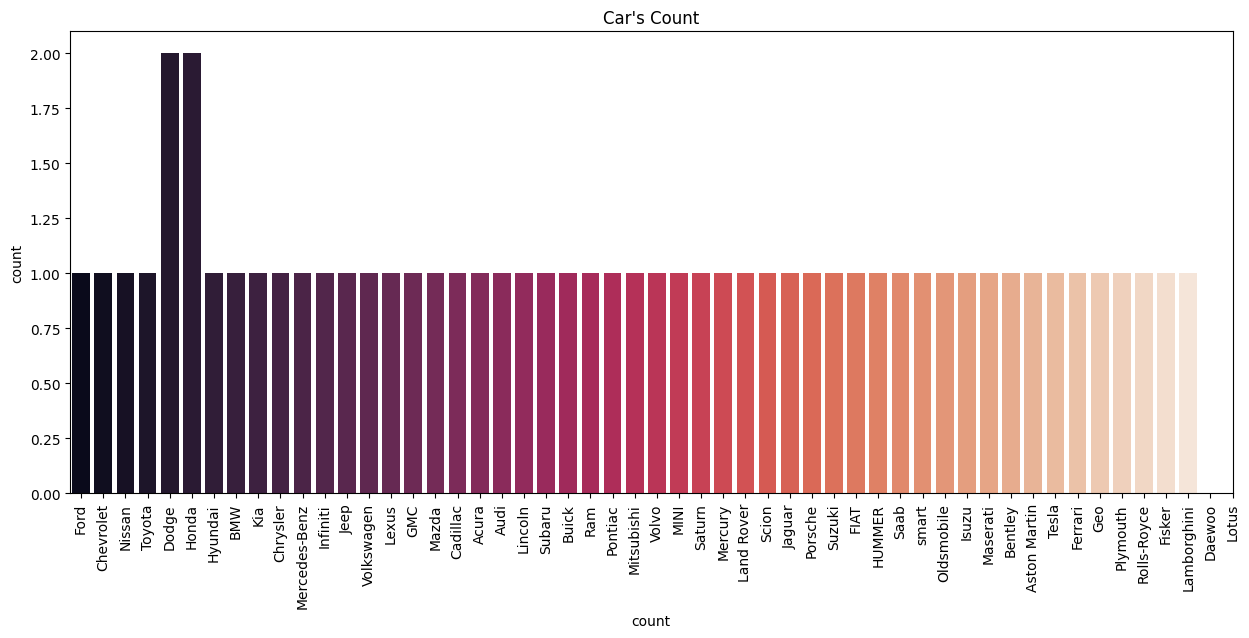

In [11]:
fig=plt.figure(figsize=(15,6))
axes=fig.subplots(1,1)
make=data.make.unique()
newvalue=data.make.value_counts()
sb.countplot(data=newvalue,x=newvalue.index,ax=axes,palette='rocket')
axes.set_xticks(range(0,len(newvalue)),newvalue.index,rotation=90)
axes.set_title("Car's Count")

****Variabilty in Car's Price****

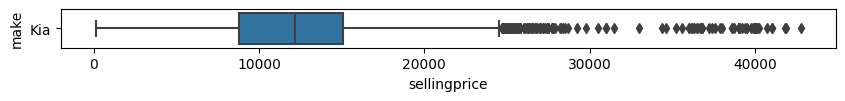

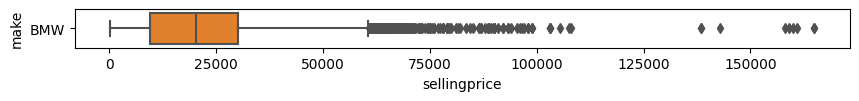

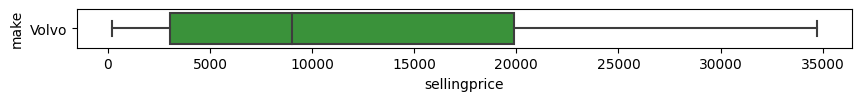

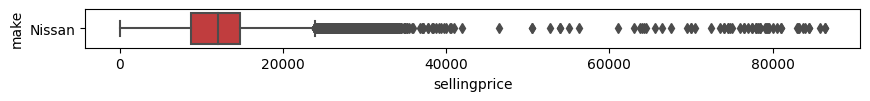

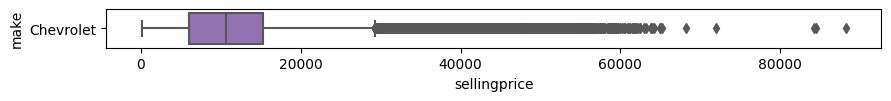

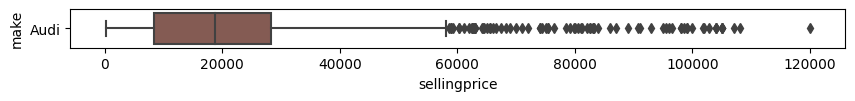

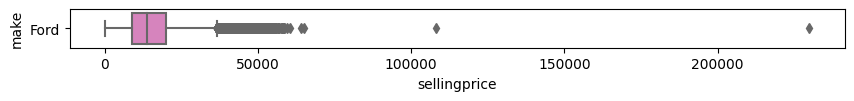

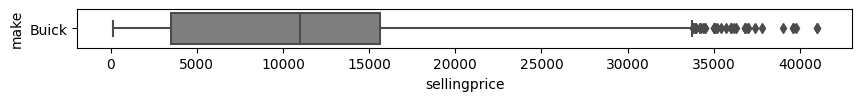

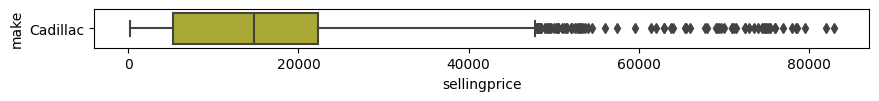

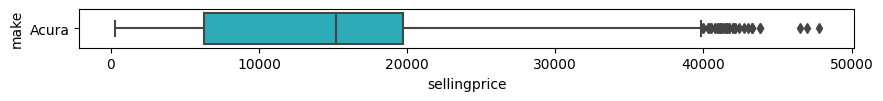

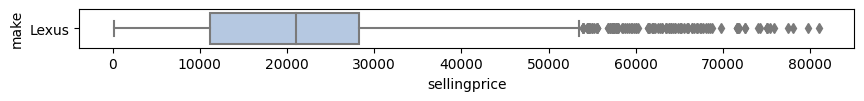

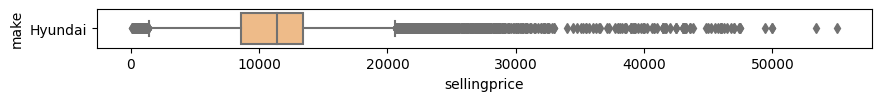

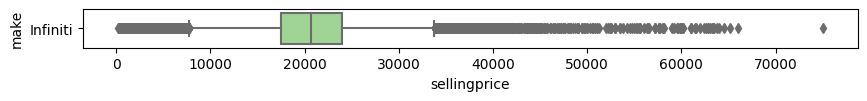

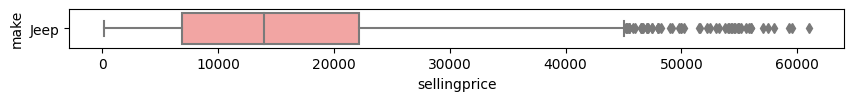

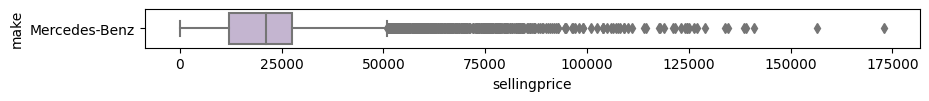

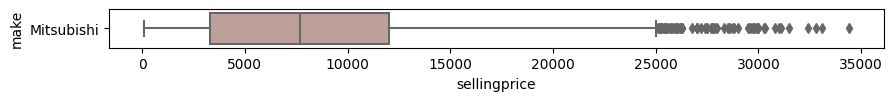

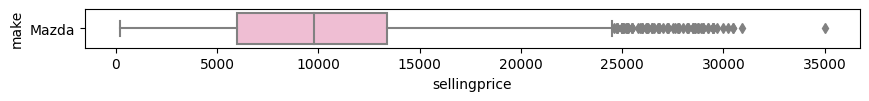

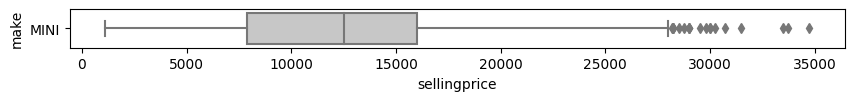

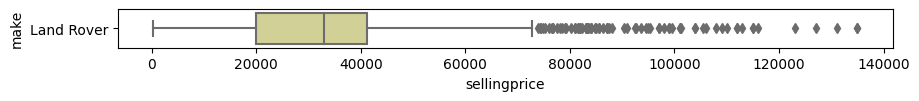

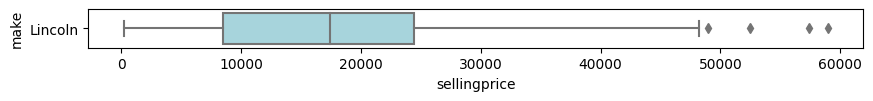

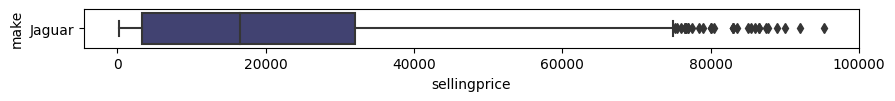

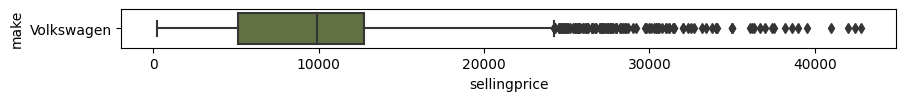

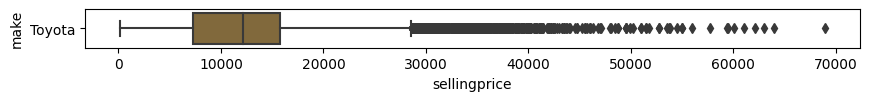

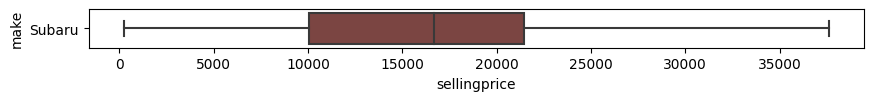

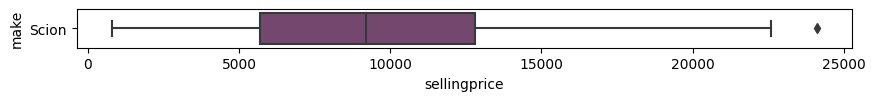

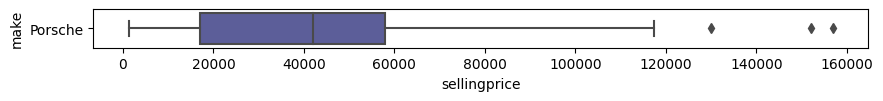

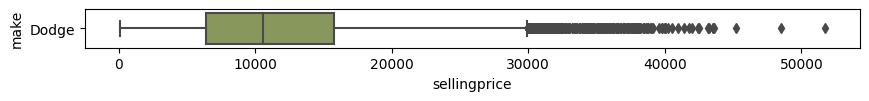

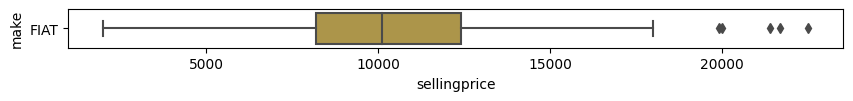

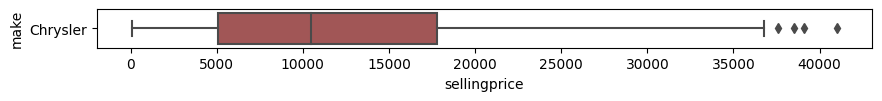

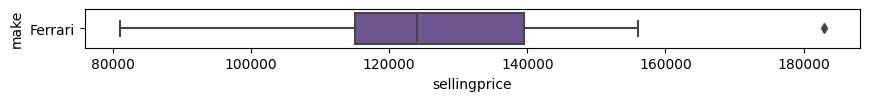

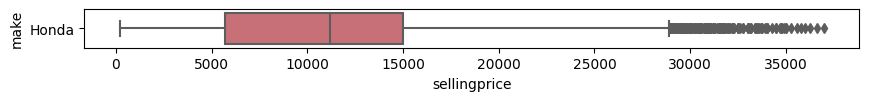

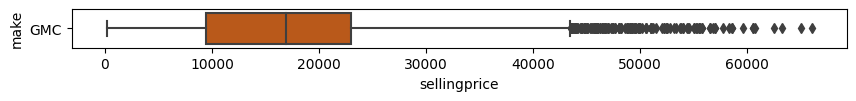

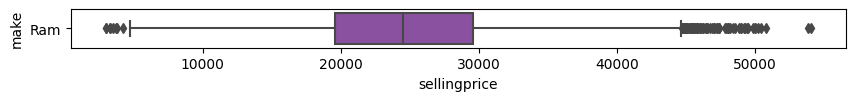

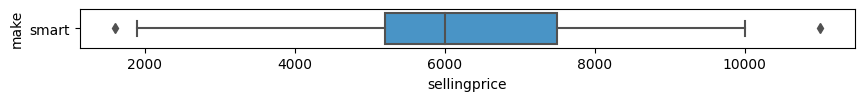

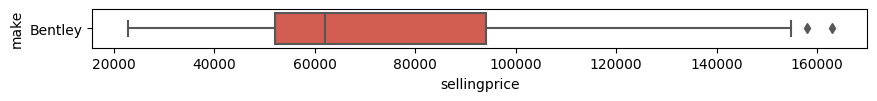

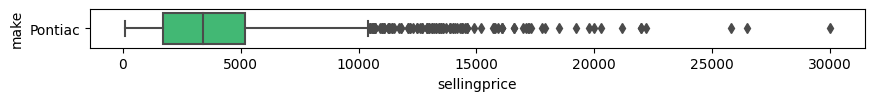

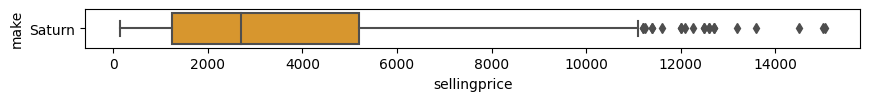

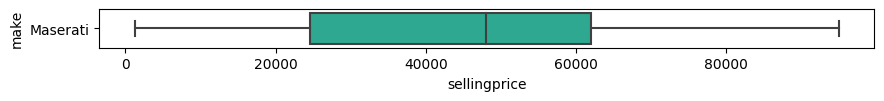

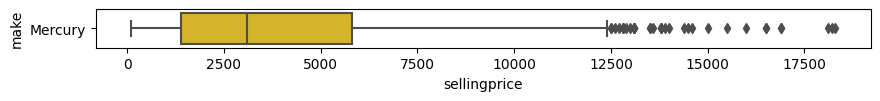

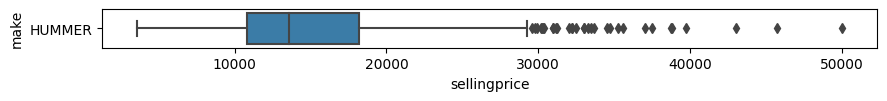

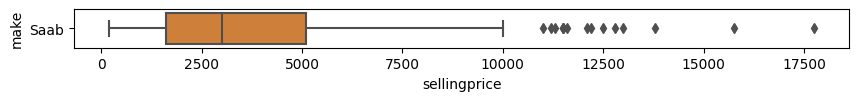

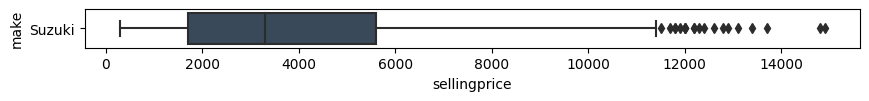

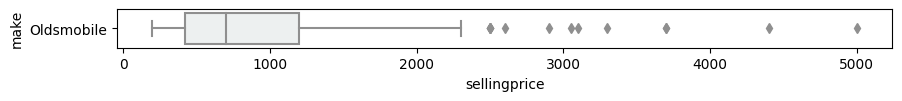

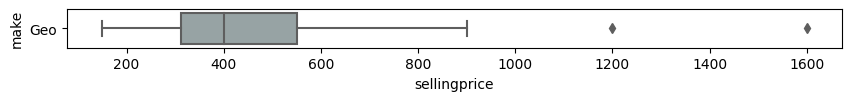

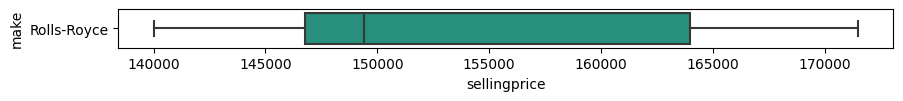

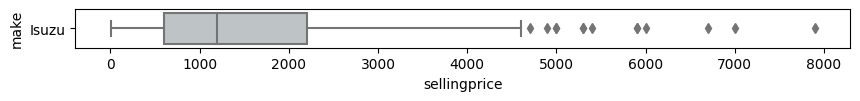

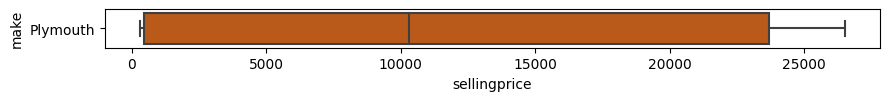

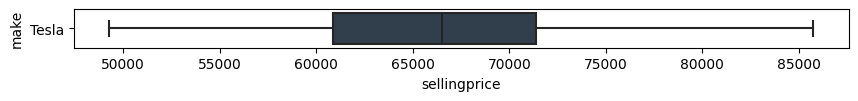

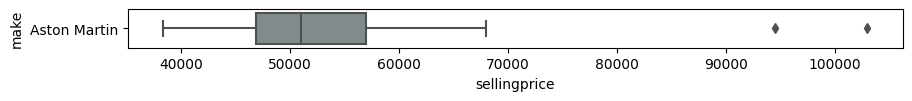

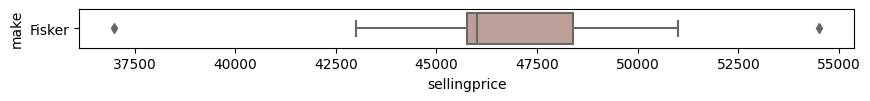

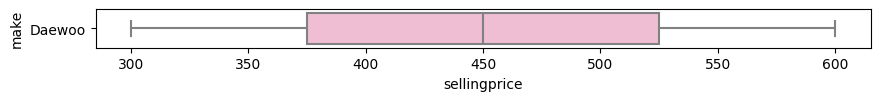

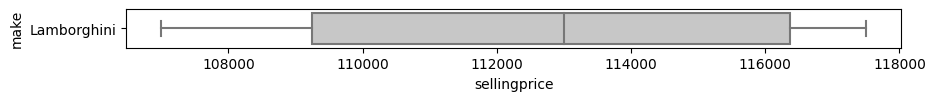

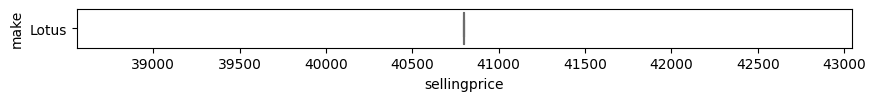

In [12]:
grouped_make=data[['make','sellingprice']].groupby('make')
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#6b4c9a',
    '#d6616b', '#d35400', '#8e44ad', '#3498db', '#e74c3c',
    '#2ecc71', '#f39c12', '#1abc9c', '#f1c40f', '#2980b9',
    '#e67e22', '#34495e', '#ecf0f1', '#95a5a6', '#16a085',
    '#bdc3c7', '#d35400', '#2c3e50', '#7f8c8d','#c49c94',
    '#f7b6d2', '#c7c7c7', '#dbdb8d'
]
count=0
for i in make:
    plt.figure(figsize=(10,0.5))
    df=grouped_make.get_group(i)
    sb.boxplot(data=df,x='sellingprice',y='make',color=colors[count])
    count+=1
    plt.show()

Text(0.5, 1.0, 'Condition of Cars over years')

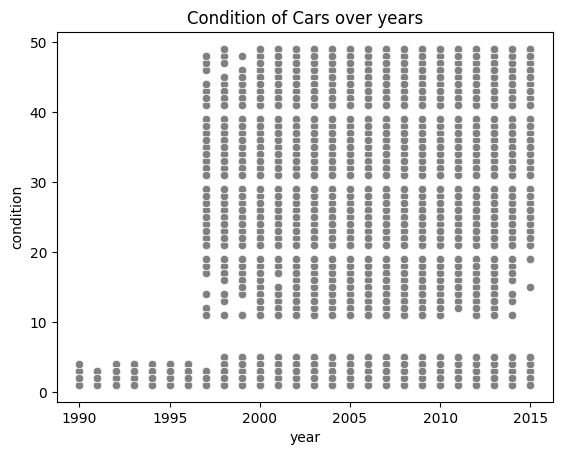

In [13]:
sb.scatterplot(data=data,x='year',y='condition',color='grey')
plt.title('Condition of Cars over years')

Text(0.5, 1.0, 'State')

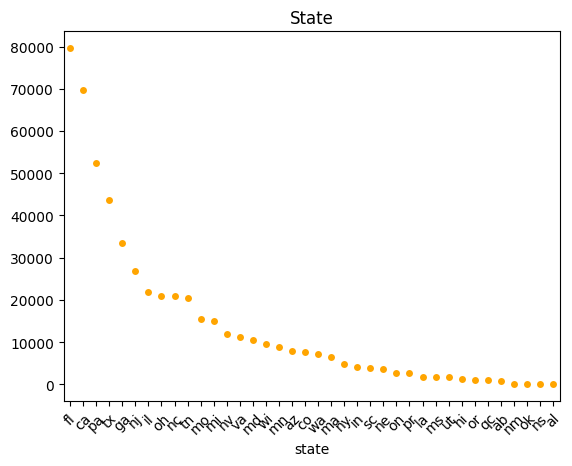

In [14]:
newdata=data.state.value_counts()
labels = newdata.index
sizes = newdata.values

sb.swarmplot(x=labels,y=sizes,color='orange')
plt.xticks(rotation=45)
plt.title('State')

Text(0.5, 1.0, 'Year Vs Odometer')

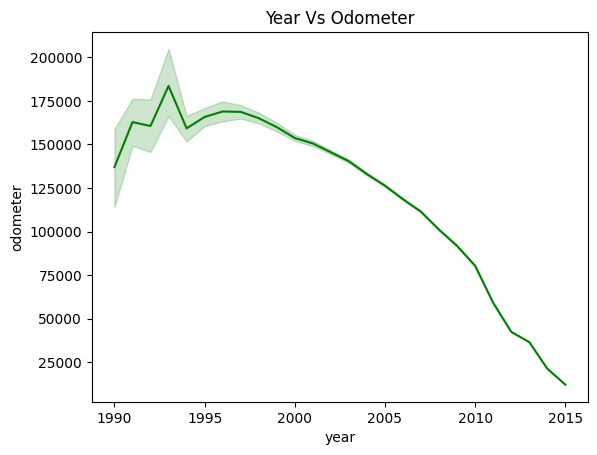

In [15]:
newdata=data[['year','odometer']]
sb.lineplot(data=newdata,x='year',y='odometer',color='green')
plt.title('Year Vs Odometer')

Text(0.5, 1.0, 'Price Over Year')

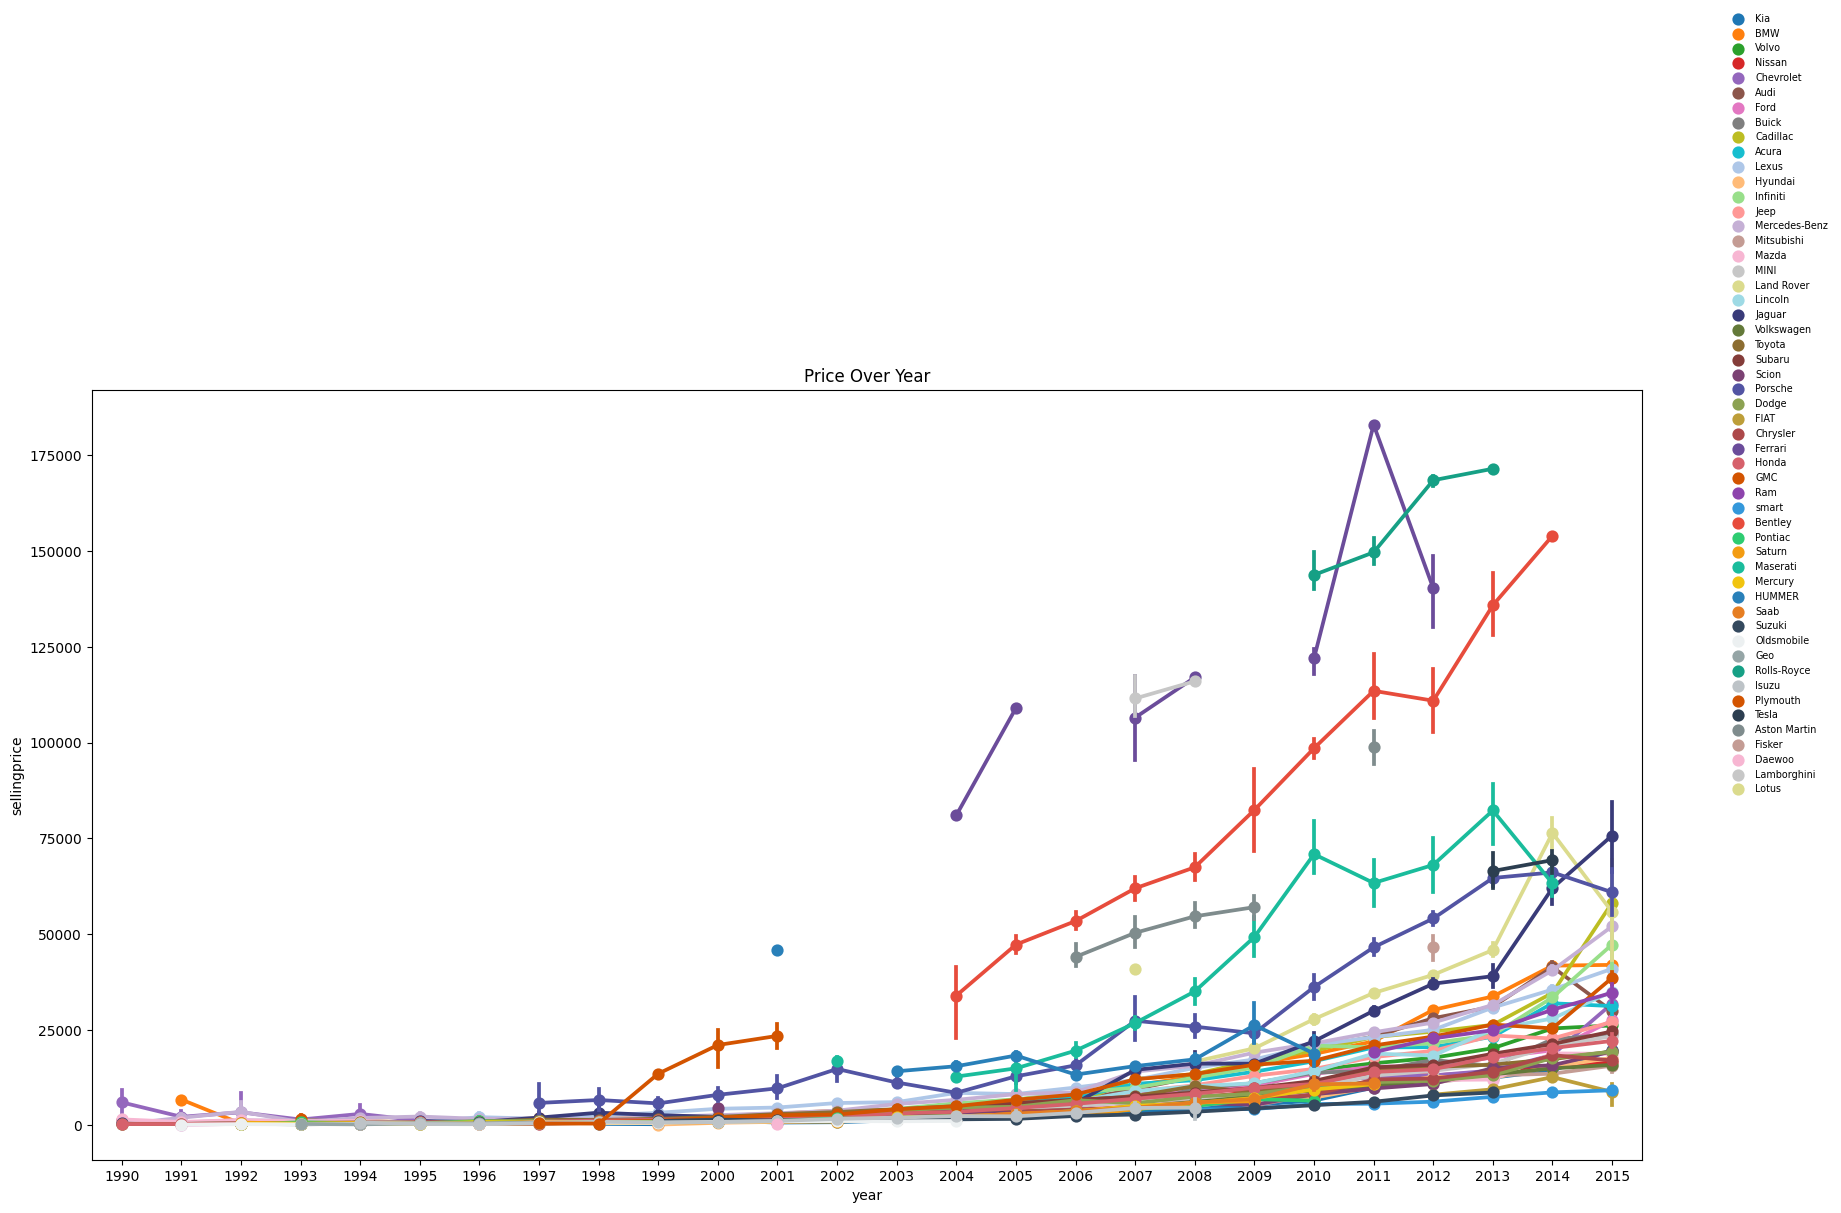

In [16]:
fig=plt.figure(figsize=(20,10))
grouped_data=data[['make','sellingprice','year']]
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#6b4c9a',
    '#d6616b', '#d35400', '#8e44ad', '#3498db', '#e74c3c',
    '#2ecc71', '#f39c12', '#1abc9c', '#f1c40f', '#2980b9',
    '#e67e22', '#34495e', '#ecf0f1', '#95a5a6', '#16a085',
    '#bdc3c7', '#d35400', '#2c3e50', '#7f8c8d','#c49c94',
    '#f7b6d2', '#c7c7c7', '#dbdb8d'
]
ax=sb.pointplot(data=grouped_data,x='year',y='sellingprice',hue='make',palette=colors)

ax.legend(bbox_to_anchor=(1.05, 1,0.5,0.5), loc='upper left',fontsize='x-small',frameon=False)
ax.set_title('Price Over Year')

Text(0.5, 1.0, 'Interior and Exterior')

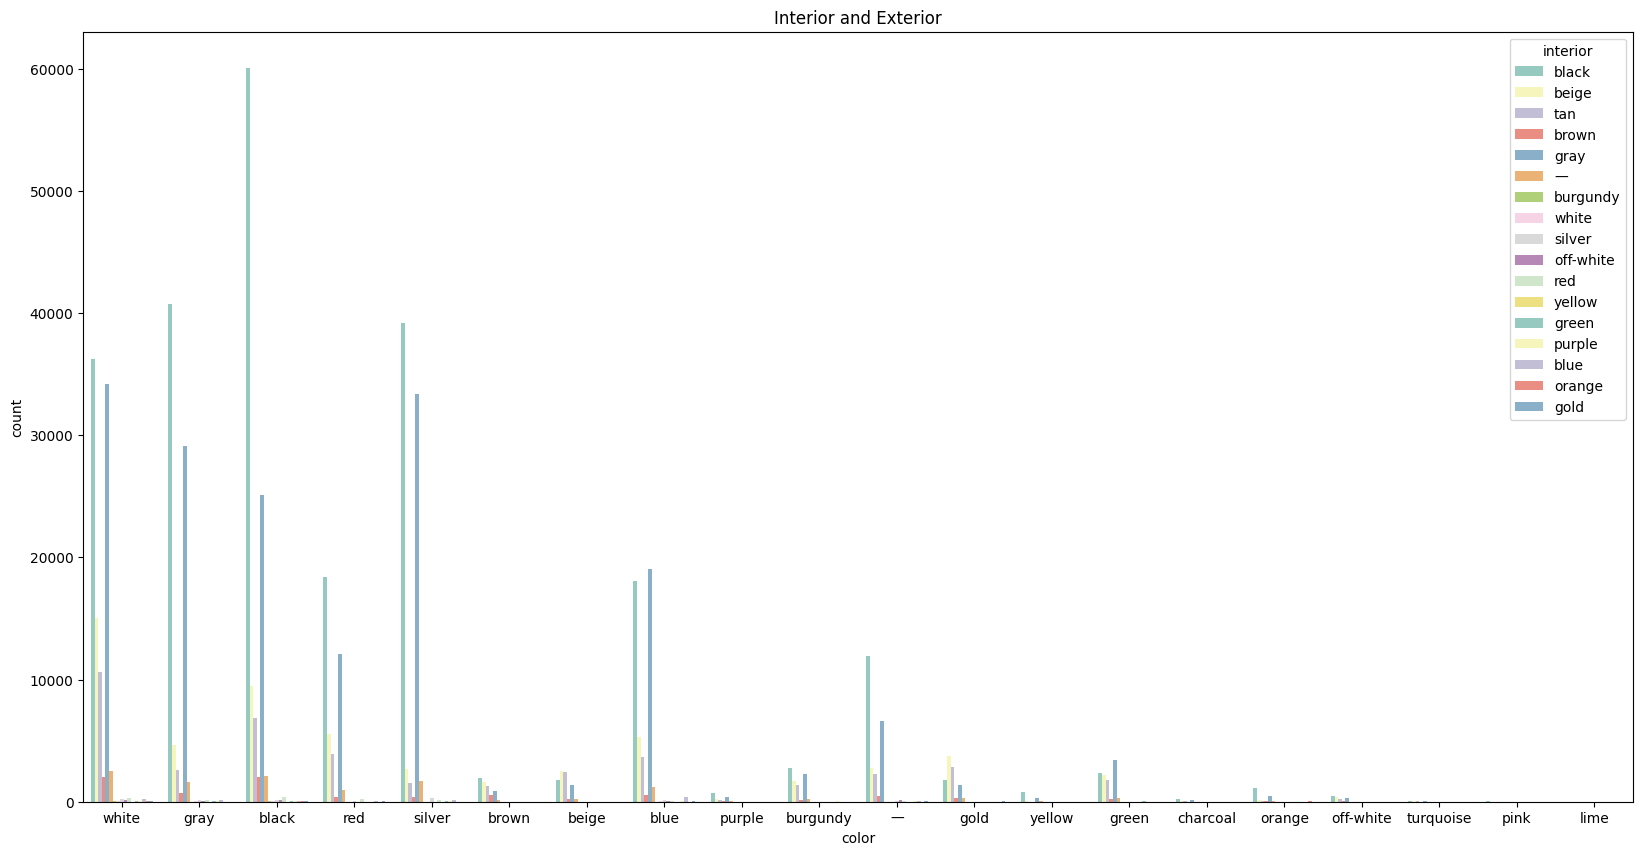

In [17]:
plt.figure(figsize=(20,10))
newdata=data[['interior','color']]
sb.countplot(data=newdata,x='color',hue='interior',palette='Set3')
plt.title('Interior and Exterior')

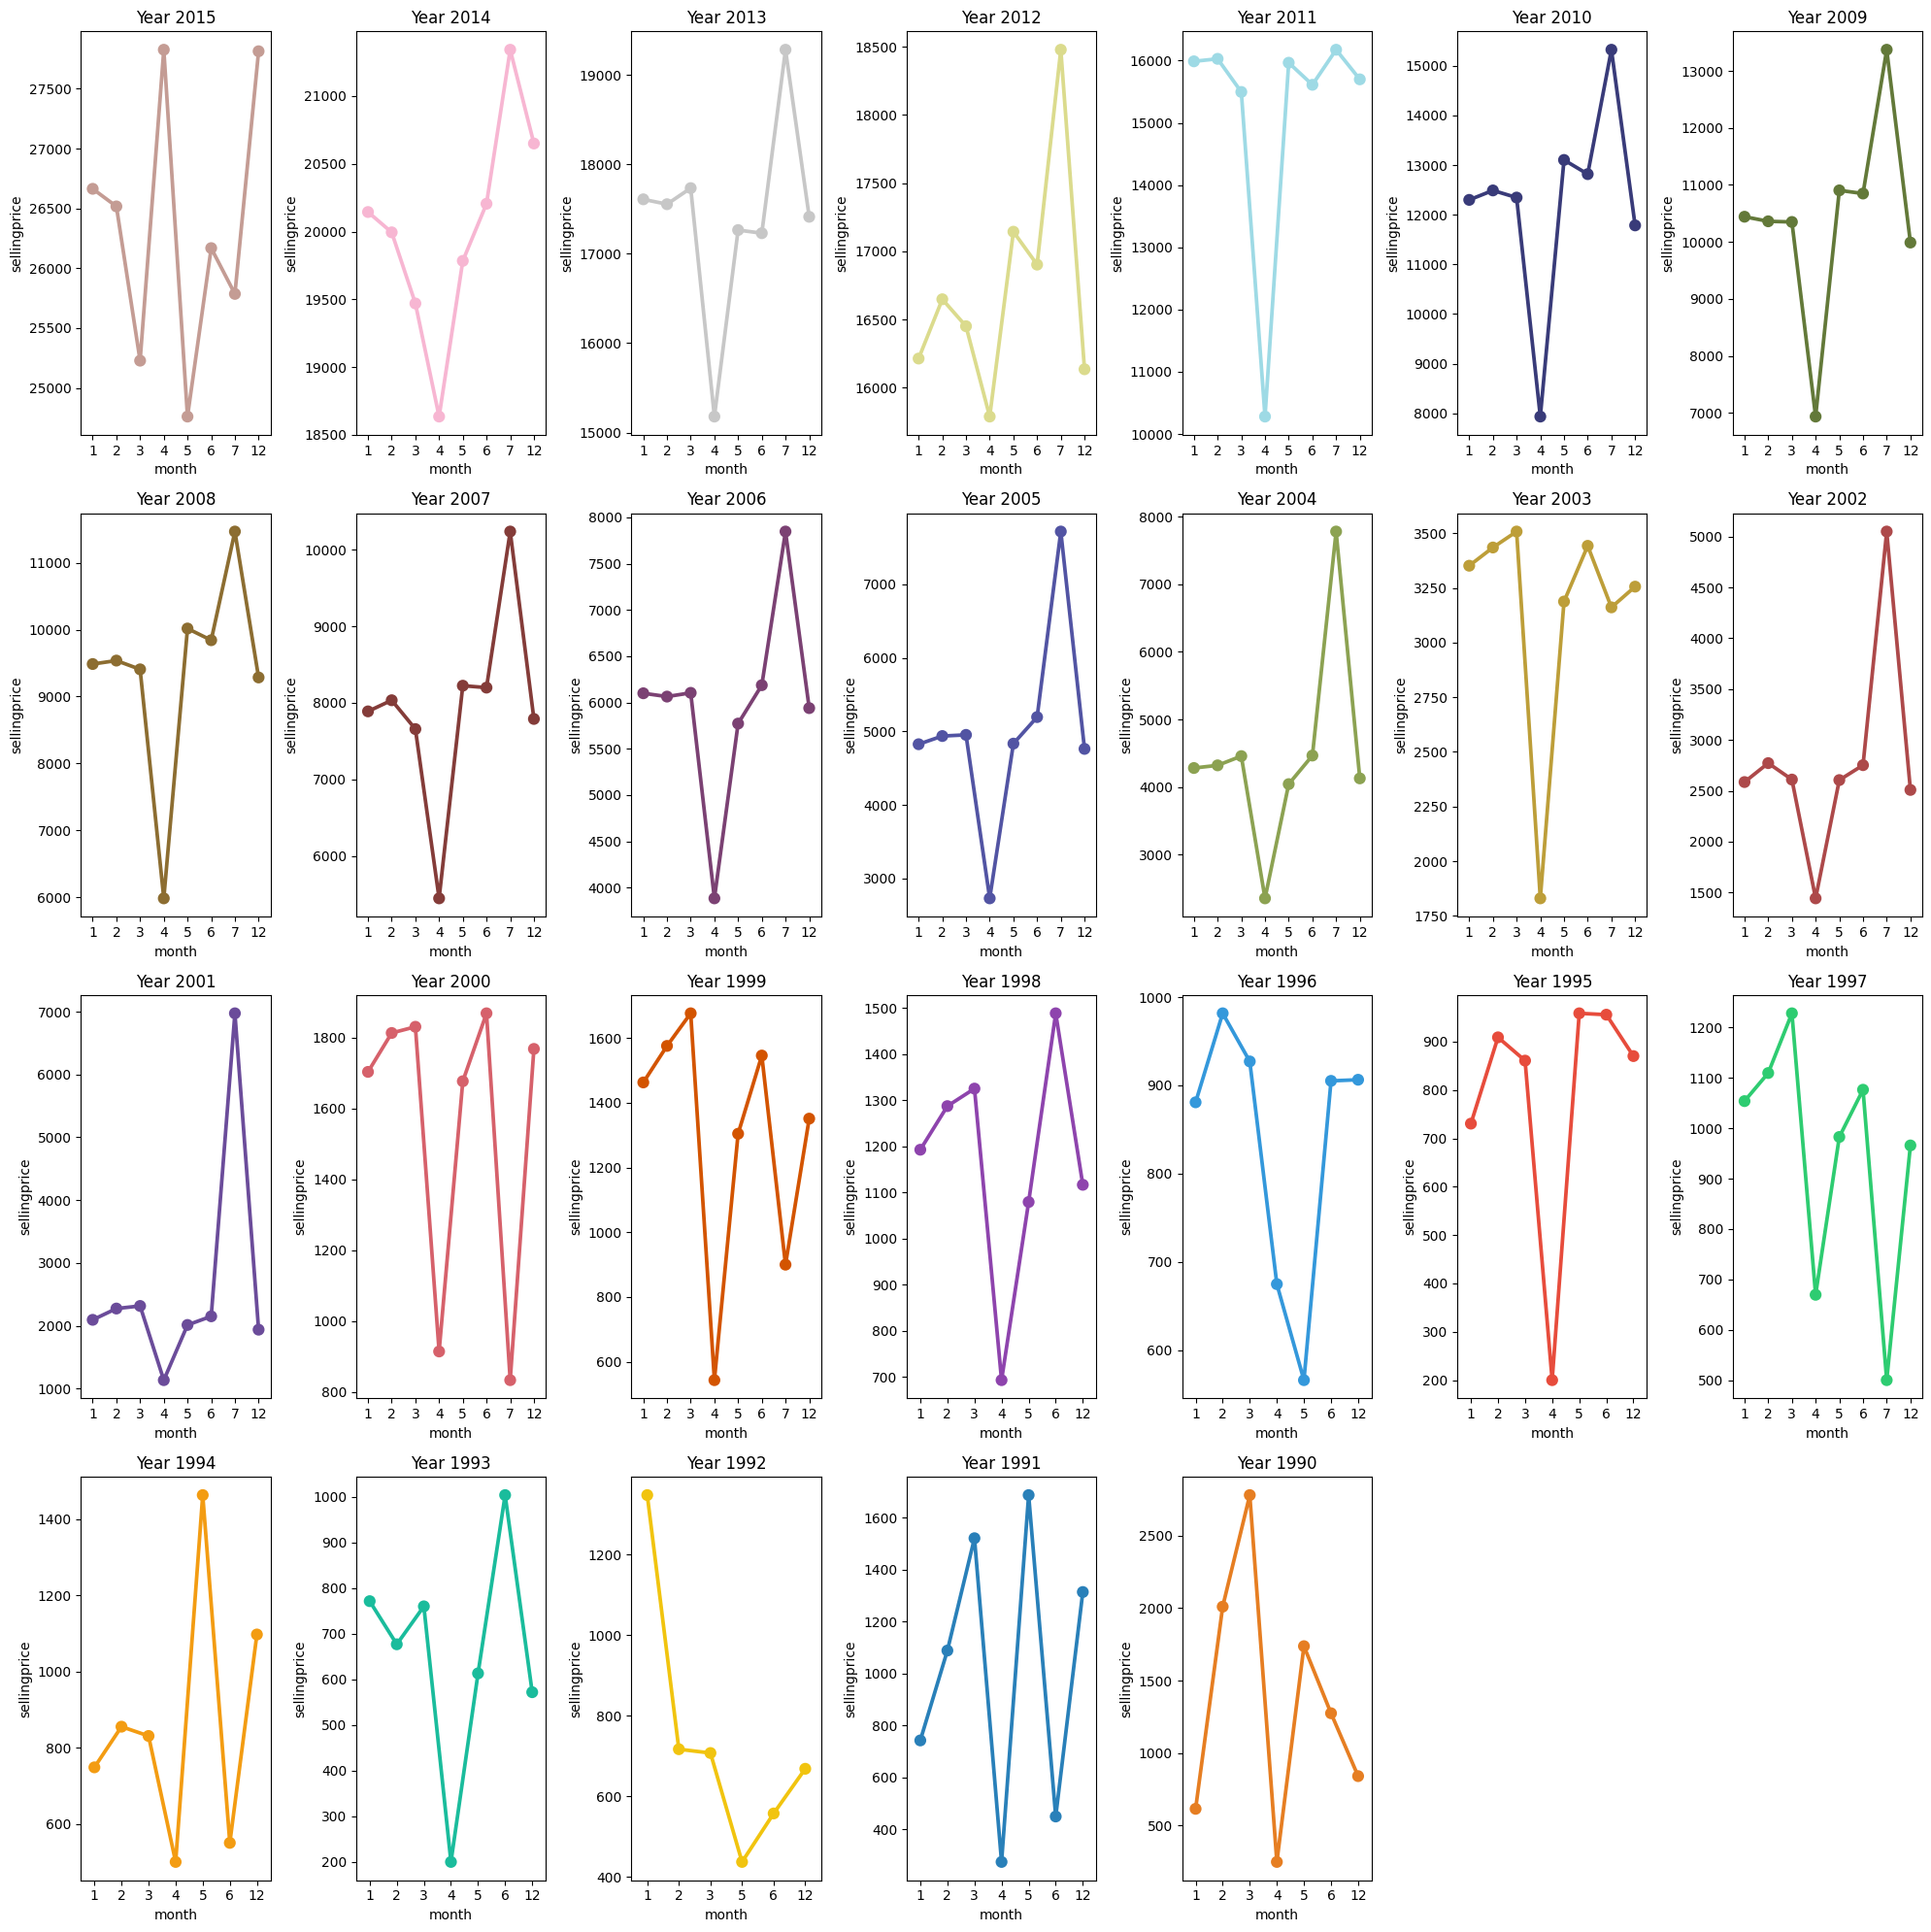

In [18]:
data['month']=data.saledate.apply(lambda X : X.month)
colors=['#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#6b4c9a',
    '#d6616b', '#d35400', '#8e44ad', '#3498db', '#e74c3c',
    '#2ecc71', '#f39c12', '#1abc9c', '#f1c40f', '#2980b9',
    '#e67e22']
years=data.year.unique()
grouped_data=data[['year','month','sellingprice']].groupby('year')
fig=plt.figure(figsize=(20,20))
axes=fig.subplots(4,7)
axes=axes.flatten()
count=0
for i in years:
    df=grouped_data.get_group(i)
    sb.pointplot(data=df,x='month',y='sellingprice',ax=axes[count],color=colors[count],ci=None)
    axes[count].set_title(f'Year {i}')
    count+=1
fig.delaxes(axes[-2])
fig.delaxes(axes[-1])
plt.tight_layout()

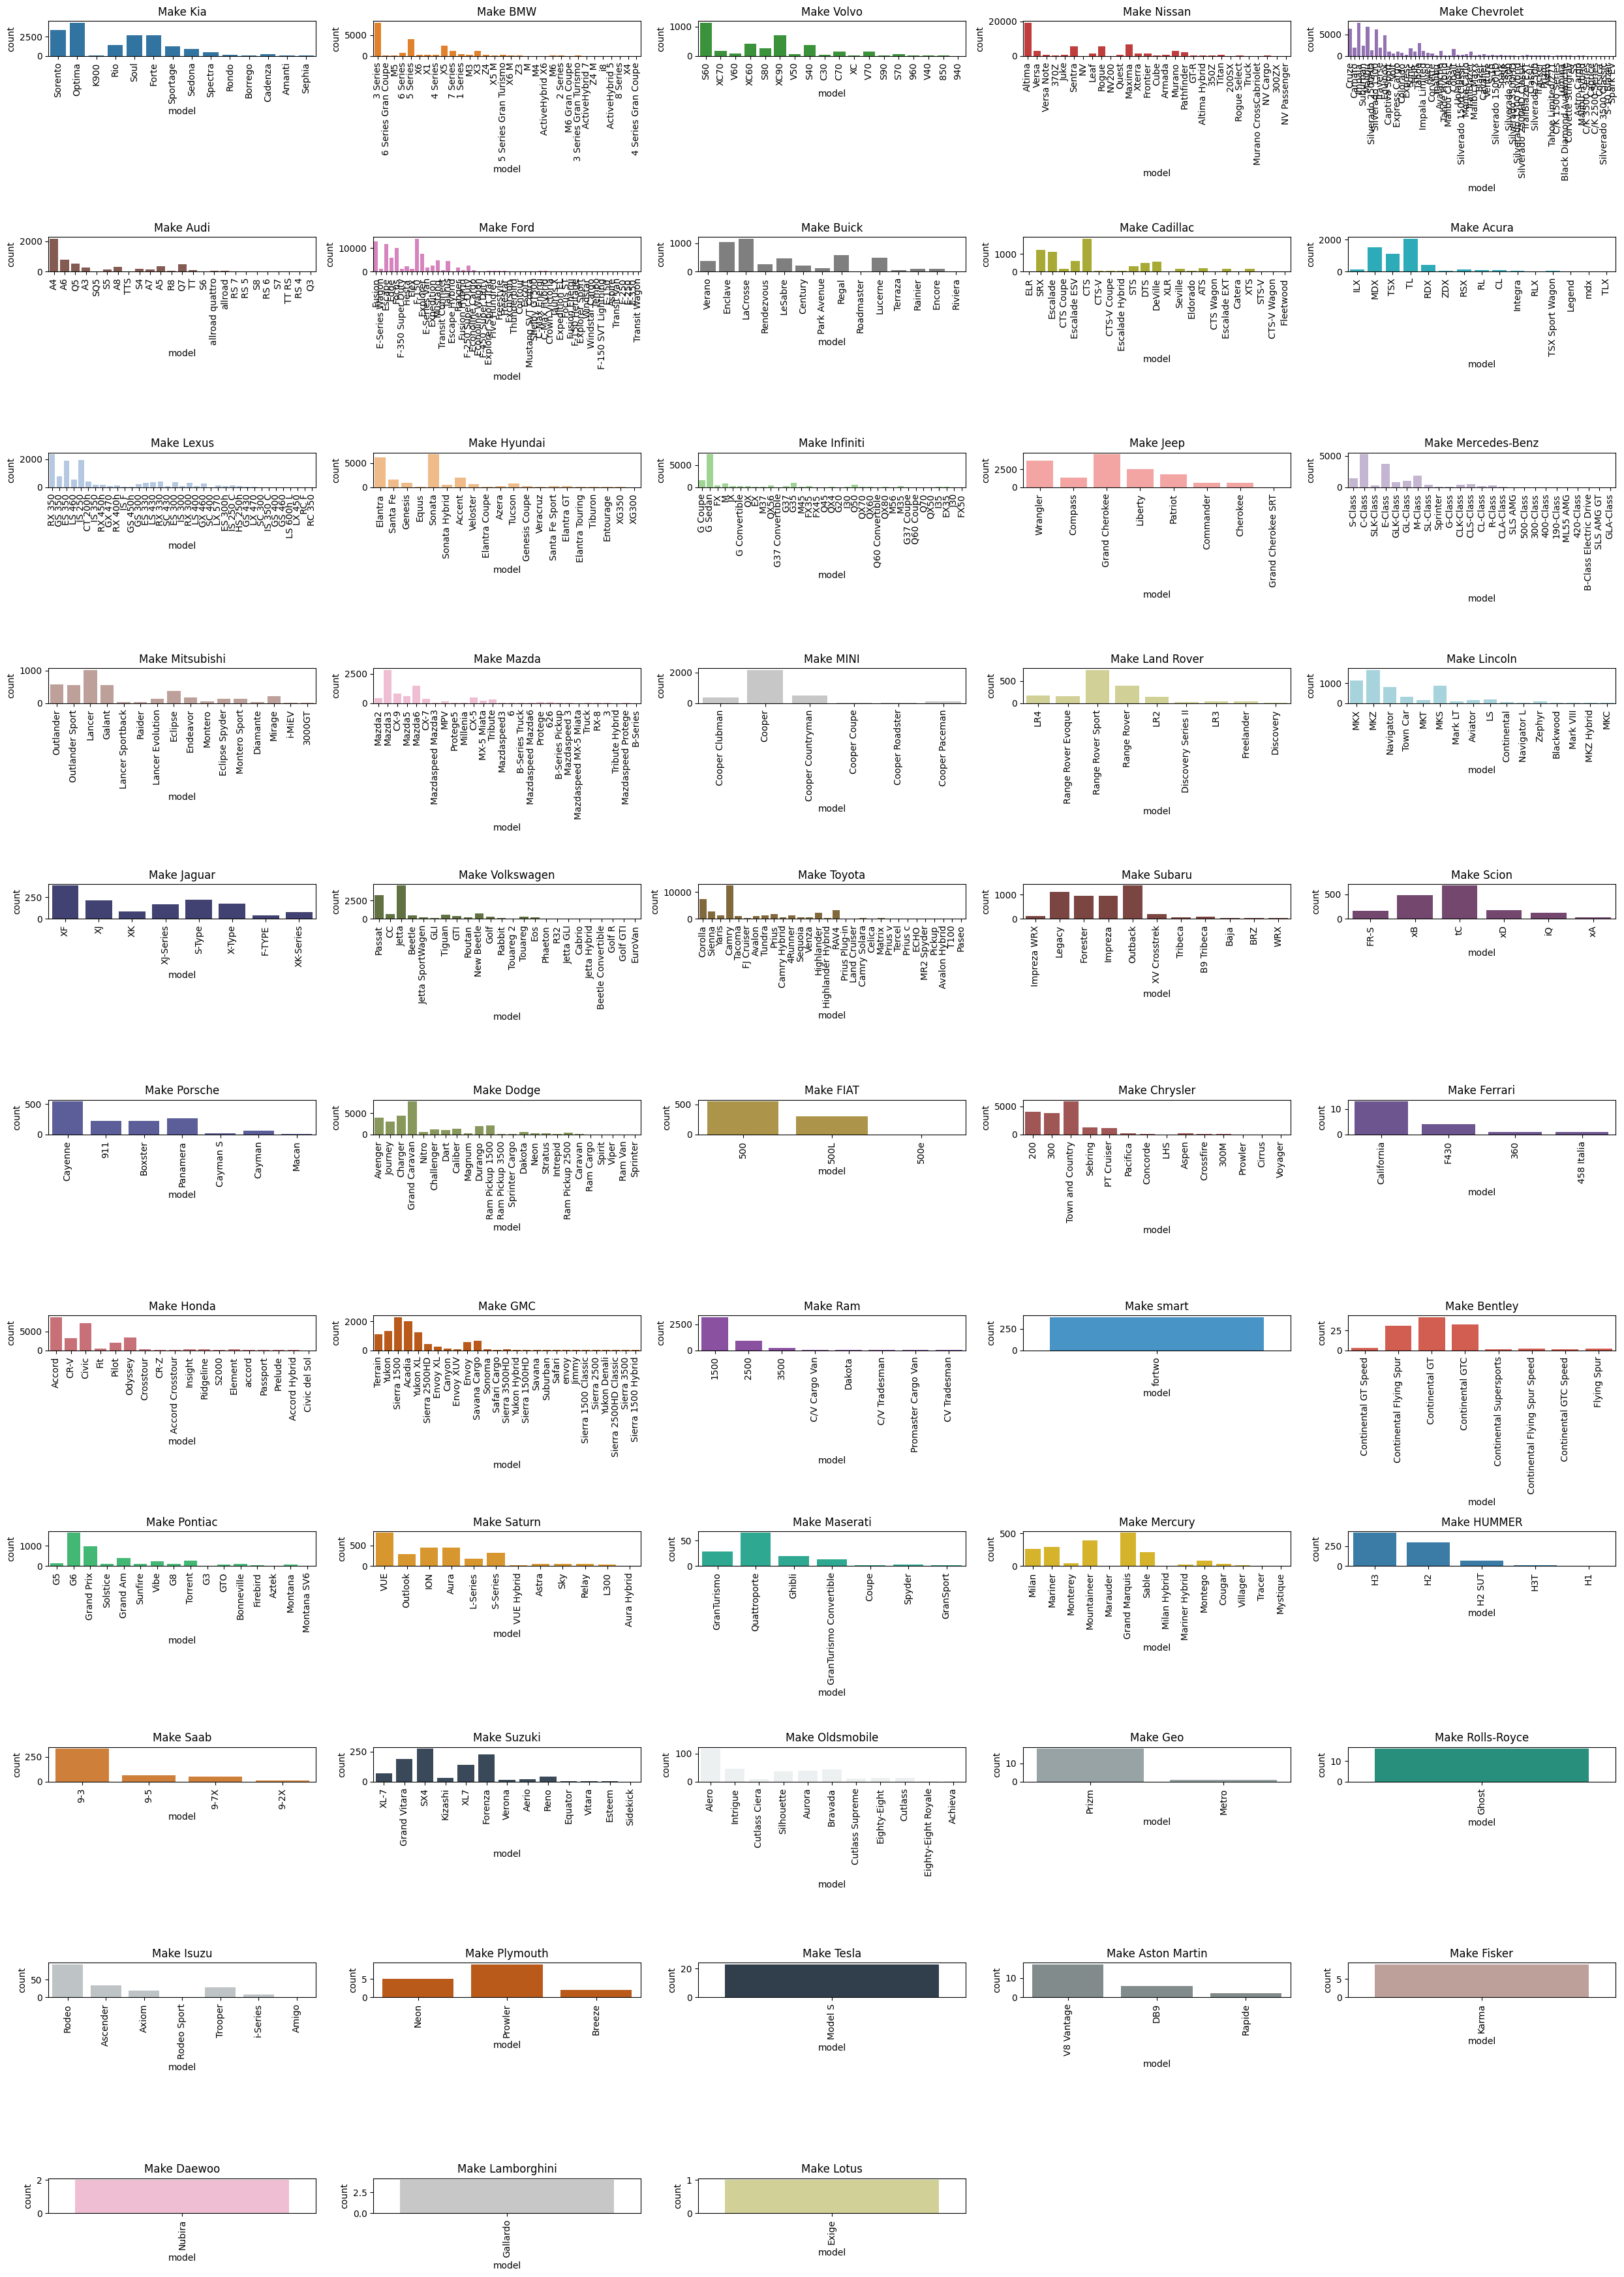

In [19]:
make=data.make.unique()
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#5254a3', '#8ca252', '#bd9e39', '#ad494a', '#6b4c9a',
    '#d6616b', '#d35400', '#8e44ad', '#3498db', '#e74c3c',
    '#2ecc71', '#f39c12', '#1abc9c', '#f1c40f', '#2980b9',
    '#e67e22', '#34495e', '#ecf0f1', '#95a5a6', '#16a085',
    '#bdc3c7', '#d35400', '#2c3e50', '#7f8c8d','#c49c94',
    '#f7b6d2', '#c7c7c7', '#dbdb8d'
]
fig=plt.figure(figsize=(25,35))
axes=fig.subplots(11,5)
axes=axes.flatten()
count=0
for i in make:
    df=data.groupby('make').get_group(i)
    sb.countplot(data=df,x='model',ax=axes[count],color=colors[count])
    axes[count].set_title(f'Make {i}')
    axes[count].set_xticklabels(labels=df.model.unique(),rotation=90)
    count+=1
for i in range(-1,-3,-1):
      fig.delaxes(axes[i])
plt.subplots_adjust(hspace=0.7)
plt.tight_layout()

Text(0.5, 1.0, 'Top 100 Models')

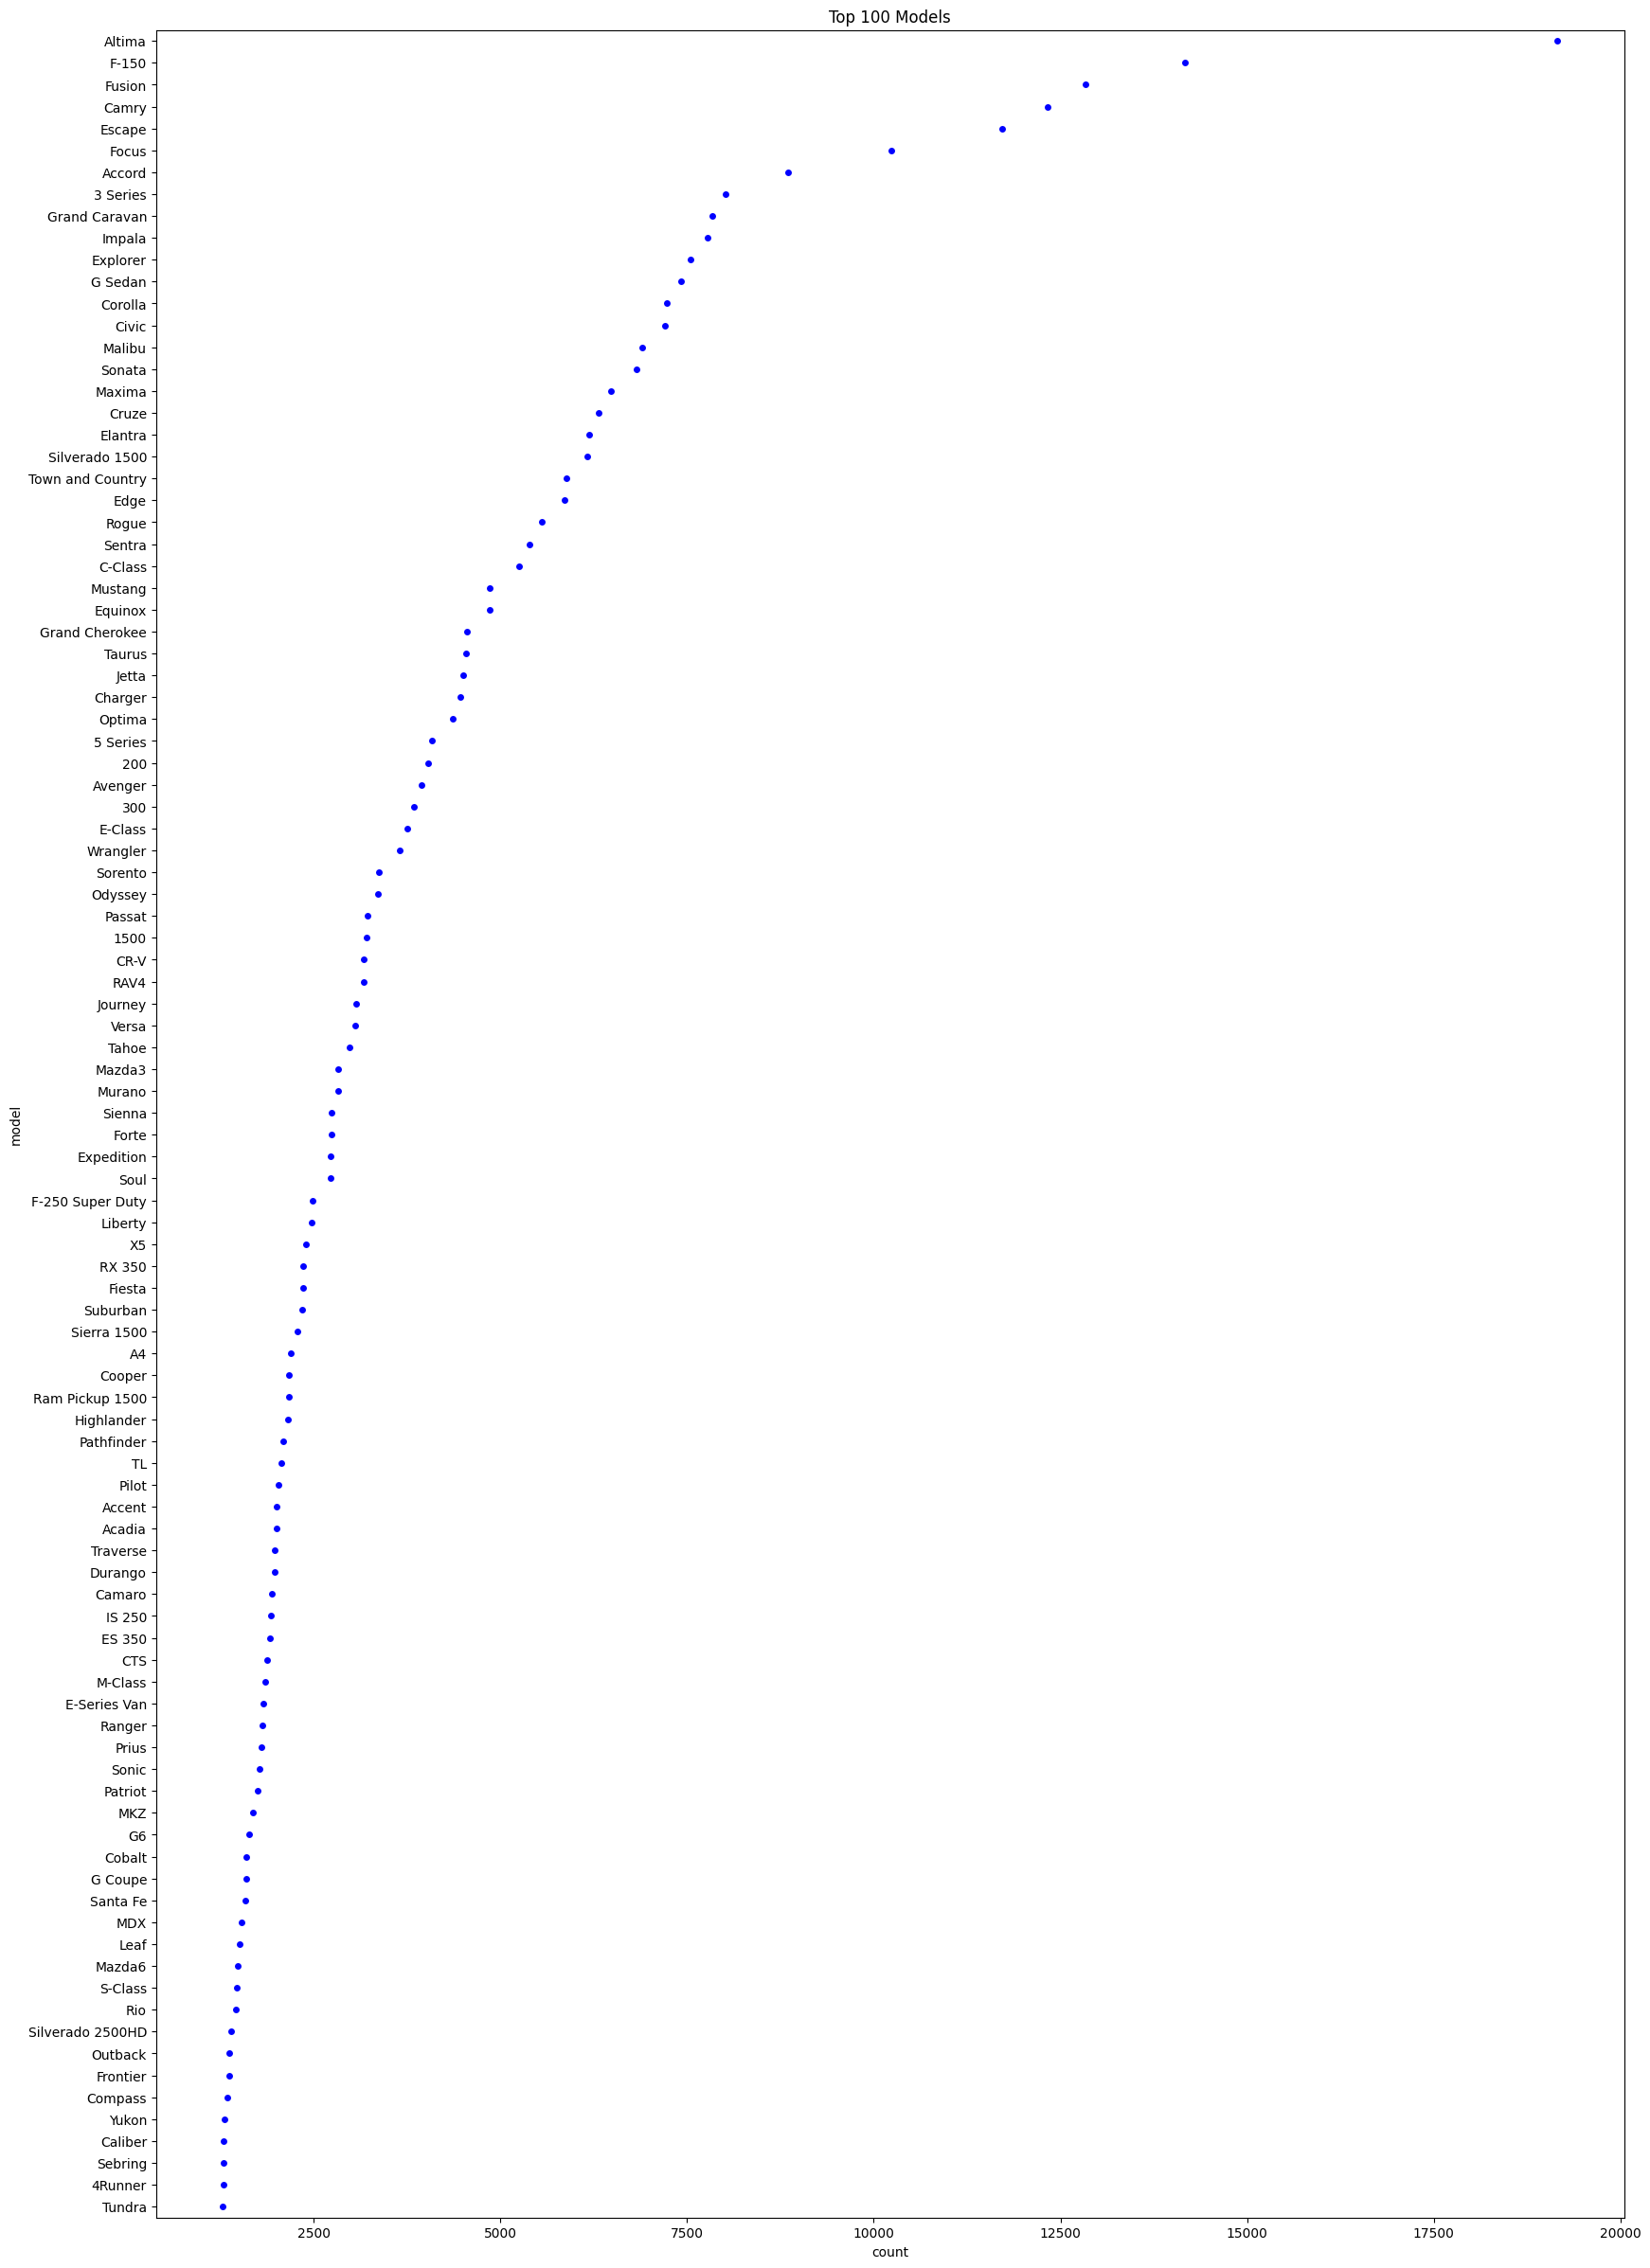

In [20]:
plt.figure(figsize=(20,30))
df=data.model.value_counts()[:100]
sb.swarmplot(x=df,y=df.index,color='blue')
plt.title('Top 100 Models')